In [2]:
#importing all Library
import numpy as np	
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/data.csv", encoding='latin1')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.shape

(541909, 8)

In [8]:
#Checking for null value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Chechking for duplicate value and dropping that
df.duplicated().sum()

5268

In [10]:
#Drop Duplicates
df = df.drop_duplicates()

#Check again
df.duplicated().sum()

0

In [11]:
#Checking Null Values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
for col in df.columns:
    percentage_missing = df[col].isnull().mean()
    print(f'{col} - {percentage_missing :.1%}')

InvoiceNo - 0.0%
StockCode - 0.0%
Description - 0.3%
Quantity - 0.0%
InvoiceDate - 0.0%
UnitPrice - 0.0%
CustomerID - 25.2%
Country - 0.0%


- There is missing values in "Description" and "CustomerID "columns 
- making a new dataframe without null values for RFM Analysis

In [13]:
copy = df.copy()

#Dealing with missing values in our main data
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID']  = df['CustomerID'].fillna(0)

In [14]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.value_counts()

InvoiceNo  StockCode  Description                        Quantity  InvoiceDate      UnitPrice  CustomerID  Country       
536365     21730      GLASS STAR FROSTED T-LIGHT HOLDER   6        12/1/2010 8:26   4.25       17850.0     United Kingdom    1
568870     22041      RECORD FRAME 7" SINGLE SIZE         12       9/29/2011 12:11  2.55       17930.0     United Kingdom    1
568869     23288      GREEN VINTAGE SPOT BEAKER           8        9/29/2011 12:01  0.85       12957.0     United Kingdom    1
           23287      RED VINTAGE SPOT BEAKER             8        9/29/2011 12:01  0.85       12957.0     United Kingdom    1
           23245      SET OF 3 REGENCY CAKE TINS          4        9/29/2011 12:01  4.95       12957.0     United Kingdom    1
                                                                                                                            ..
552668     DOT        DOTCOM POSTAGE                      1        5/10/2011 15:05  168.63     0.0         United Ki

In [16]:
#checking data type of all column
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [17]:
#Convert InvoiceDate to datatime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype('int64')

<Axes: ylabel='UnitPrice'>

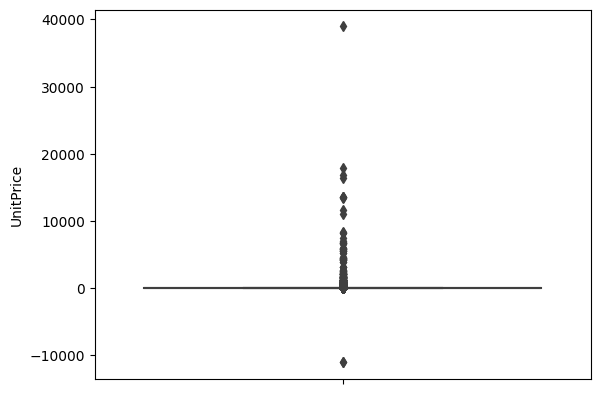

In [18]:
#Check Unit Price `s Distribution
sns.boxplot( y= 'UnitPrice' ,data =df)

In [19]:
#some value are under zero 
df[df['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom


In [20]:
#since the value are of debt we dont require that so we can drop it 
df  = df[df['UnitPrice'] > 0]

<Axes: ylabel='UnitPrice'>

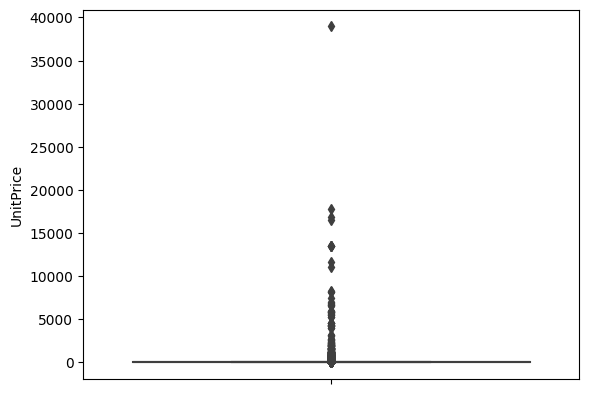

In [21]:
sns.boxplot( y= 'UnitPrice' ,data =df)

In [22]:
#Check the minimum unit price
df['UnitPrice'].min()

0.001

In [23]:
#Making a new column as the total price is not given 
df['Checkout_Price'] = df['Quantity'] * df ['UnitPrice']

In [24]:
#Making a new columns for time series analysis
df['Year'] = df['InvoiceDate'].dt.year
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].astype(str)


In [25]:
#since few data are in cancelled oreder we need to get rid of that 
canceled = df[df['InvoiceNo'].str.contains('C')]
df = df[~df['InvoiceNo'].str.contains('C' ,na = False)]

In [26]:
#Customer Type Column
df.loc[df['CustomerID'] == 0 , 'CustomerType'] = 'Normal'
df.loc[df['CustomerID'] > 0 , 'CustomerType'] = 'Member'

In [27]:
#old Dataframe
copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Checkout_Price,Year,YearMonth,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010-12,Member
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12,Member
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010-12,Member
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12,Member
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12,Member
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,2011-12,Member
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,2011-12,Member
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011-12,Member
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011-12,Member


In [48]:
from google.colab import files
df.to_csv('data_final.csv', encoding = 'utf-8-sig') 
files.download('data_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Analyzing the data

Top 10 product that has achieved the highest sales?

Text(0, 0.5, 'Product Description')

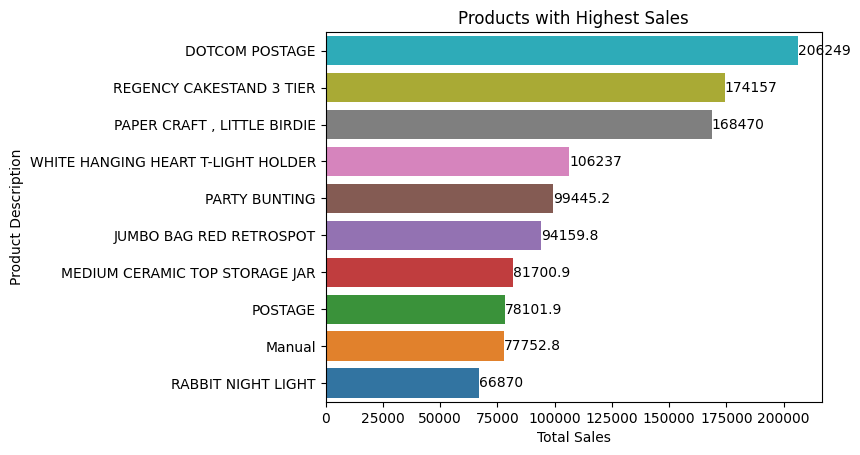

In [29]:
#Groupping Product by Checkout price
product_sales= df.groupby('Description').agg({'Checkout_Price' : 'sum'}).sort_values(by = 'Checkout_Price' , ascending = False).reset_index(drop= False).head(10)

#Choosing Palette and reverse it
Palette = sns.color_palette('tab10')
Palette.reverse() 

#Visualizing 
ad =sns.barplot(y = 'Description' , x= 'Checkout_Price' , data = product_sales , palette = Palette)

#Data labels
ad.bar_label(ad.containers[0])

#Setting Title
plt.title('Products with Highest Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')

##Top 10 Country which have more customers?

<Figure size 640x480 with 0 Axes>

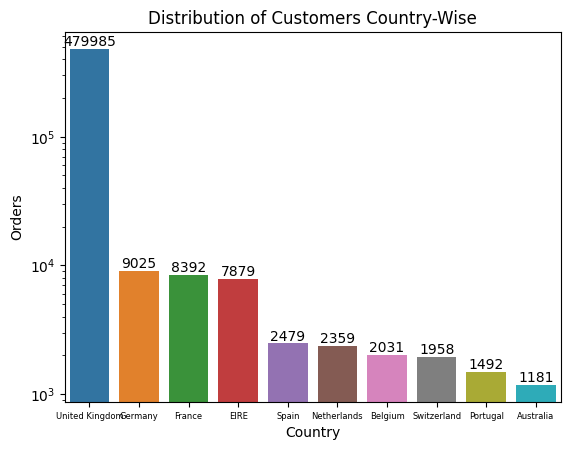

<Figure size 640x480 with 0 Axes>

In [30]:
#Counting Country
country = df['Country'].value_counts().reset_index(drop = False).head(10)
country.columns = ["Country","Counts"]

#Visualizing Data
ab = sns.barplot(x = 'Country' , y = 'Counts' ,data = country , palette ='tab10')

#Data labels
ab.bar_label(ab.containers[0])

#Setting title
plt.title('Distribution of Customers Country-Wise')
plt.ylabel('Orders')
plt.xticks(fontsize = 6)
plt.yscale('log')
plt.figure("30,12")


## distribution of customer type

Text(0.5, 1.0, 'Distribution of Customer type Count ')

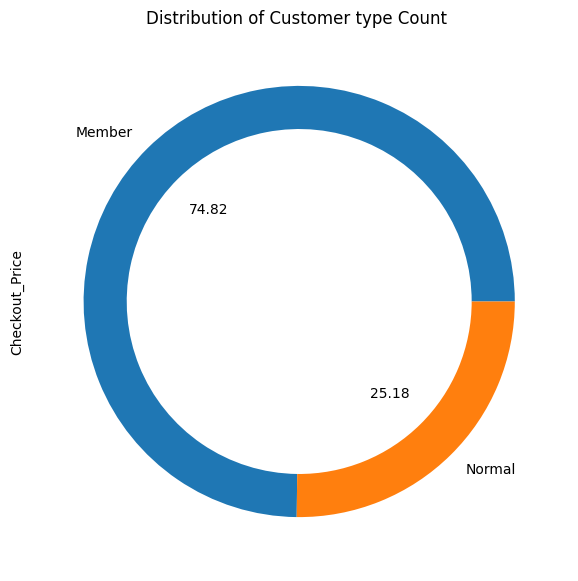

In [31]:
df.groupby('CustomerType').count()['Checkout_Price'].plot(kind='pie', autopct= '%.2f', figsize=(10,7),subplots=True, wedgeprops=dict(width=0.20))
plt.title('Distribution of Customer type Count ')

Which Products have been sold by Highest Quantity ?

Text(0, 0.5, 'Product Description')

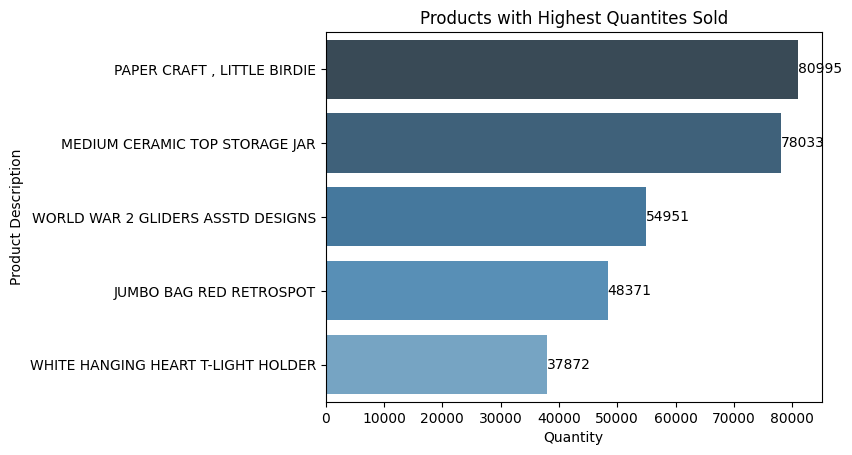

In [32]:
#Groupping Product by Quantity
product_quantity= df.groupby('Description').agg({'Quantity' : 'sum'}).sort_values(by = 'Quantity' , ascending = False).reset_index(drop= False).head(5)

#Choosing Palette and reverse it
Palette = sns.color_palette('Blues_d')
Palette.reverse()

#Visualizing 
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = product_quantity , palette = Palette)

#Data labels
ax.bar_label(ax.containers[0])

#Setting Title
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')

In which month have we gained the highest sales?

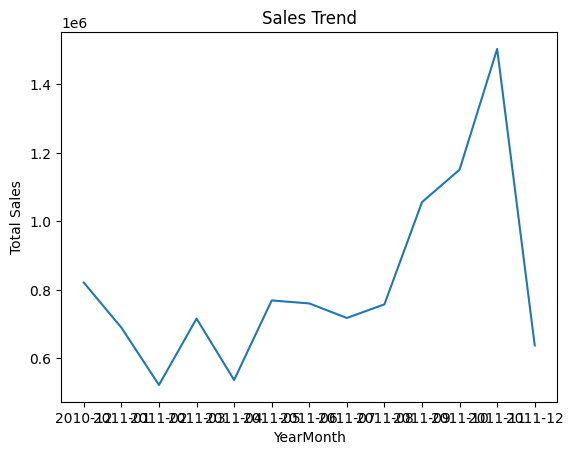

In [33]:
#Grouping month and month number by Checkout price
month_sales = df.groupby('YearMonth')['Checkout_Price'].sum().reset_index(drop = False)

#Visualizing time-series sales
sns.lineplot(x = 'YearMonth', y = 'Checkout_Price',data = month_sales)
plt.title('Sales Trend')
plt.ylabel('Total Sales')
plt.figsize=(19,10)

##Which Customer type has higher average sales?

Text(0, 0.5, 'Average Sales')

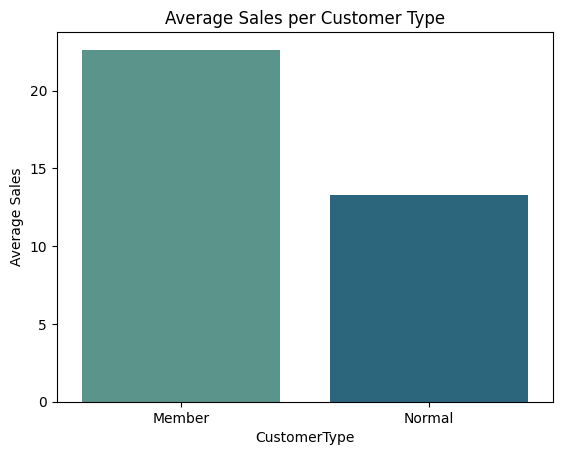

In [34]:
#Groupping customer type by average sales
customer_sales = df.groupby('CustomerType')['Checkout_Price'].mean().reset_index(drop = False)

#Visualizing Data
sns.barplot(x= 'CustomerType' , y = 'Checkout_Price' , data = customer_sales , palette = 'crest' )

#Setting Title
plt.title('Average Sales per Customer Type')
plt.ylabel('Average Sales')

As a algorithm the RFM was used, for being an easy-to-understand model.

The term RFM comes from the function of three acronyms: Recency, Frequency, and Monetary, seeking to better understand the customer and verify when was his last purchase, how many times he has bought and how much he has spent with the company.

Recency(R) Days since the customer's last purchase Frequency(F) Number of products bought by the customer Monetarity(M) Total spent on purchases

Customer Score:

The customer score ranges from 1 to 5, where the higher this number, the better. This score is assigned for each acronym independently:

- The more recent the customer's purchase the higher the Recency (R) score.
- The more purchases the customer makes, the higher the Frequency score (F)
- The more the customer spends on purchases, the higher the score the customer will have Monetarity(M)
This definition of each score can be given through inference, i.e. some business definition or by quintile.

In [35]:
#Ignoring Cancel orders
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]

#Dropping Null values in Customer ID column
copy= copy.dropna(subset= ['CustomerID'])

#Make Checkoutprice Column
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']

#Ignoring Debts
copy =copy[copy['UnitPrice']>0]

#Dealing with datatypes
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')

In [36]:
#Define today
today_date = copy['InvoiceDate'].max()

In [37]:
#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (today_date - date.max()).days ,'InvoiceNo' : lambda num :num.nunique() ,'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,176.60


In [38]:
#Naming Columns
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

In [39]:
#Ignore 0 in Monatery so we will not need those customers in our analysis 
rfm = rfm[rfm['Monetary']>0]

In [40]:
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

In [41]:
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

In [42]:
#Set Monatry Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [43]:
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str) )

Segmentation calculation:

- The calculation to know which segmentation the customer is in is given by averaging the F and R scores 

- I see that Monetary could be deceptive , So i will segment our customers on Recency and Frequency Scores

|Segment Name     | Range of Recency Score| Range of Frequency Score|
|-----------------|-------------|------
|Hibernating      | 1  - 2      | 1 - 2 |
|At risk          | 1  - 2      | 3 - 4 |
|Cannot lose them | 1  - 2      |   5   |
|About to sleep   |    3        |  1-2  |
|Need Attention   |    3        | 3 |
|Loyal Customers  |  3 - 4      | 4 - 5 |
|Promising        |   4 - 5      | 1|
|Champions       | 4 - 5|4 - 5|
|Good Potential | 4 - 5 | 2 - 3|  

In [44]:
#Our Customer Segmentation
seg_map = {
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At risk',
    r'[1-2]5[1-5]' :'Cannot lose them',
    r'3[1-2][1-5]' : 'About to sleep',
    r'33[1-5]' : 'Need Attention',
    r'[3-4][4-5][1-5]' : 'Loyal Customers',
    r'[4-5][1-3][1-5]' : 'Good Potential',
    r'5[4-5][1-5]' : 'Champions',

}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

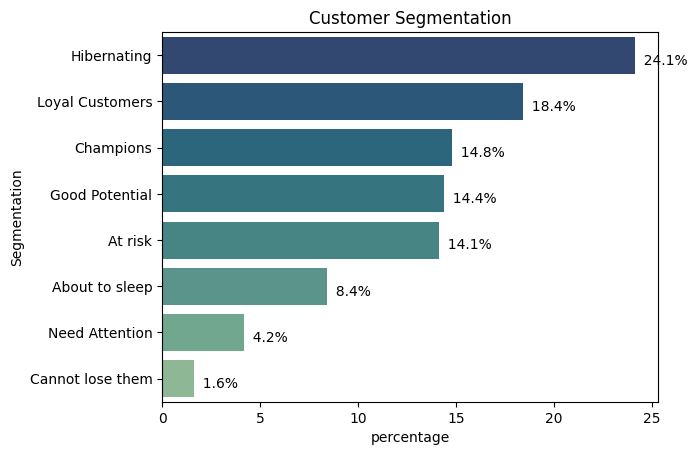

In [45]:
#Bar Plot for Our segments
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments = Segments.round(1)
b =sns.barplot(y='index',x='percentage', data=Segments, palette = 'crest_r')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20,"  {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

##Conclusion from the project

- "PAPER CRAFT , LITTLE BIRIDE" product is the most product sold
- "DOTCOM POSTAGE" has achieved the highest sales
- Most of Our customers are living in UK with very big differnce from the other countries
- The best sales was in November 2011
- 75% of purchases were made by member customers
- Member Customers have higher average sales than Normal Customers
- 24.1% of our customers are in the hibernation segment and that for customers who have purchased from us a few times and the last time was a long time
- 18.4% of our customers are loyal and usually buys from us
- 14.8% of our customers are champions so we are their favourtie market
- 14.4% of our customers have good potential that refers to customers who have bought from us recently and have not buy many times
- 14.1% of our cutomeers are at risk segment so we must attract them again
- 8.4% of our customers are about to sleep and this segment of customers who last purchase from us for a fairly long time
- 4.2% of our customers are needing more attention to make them fall under Champions segment
- 1.6% of our customers can`t lost them and they purchased from us many times but last time was for a long time

### EDA Recommendations :
- You should restrict your market to Europe
- The benefits of using member cards should be conveyed to the normal customers which will convert them to a member which means more sales and customer loyalty

### RFM Analysis Recommendations :

- **24.1% - Hibernating** : 

1. Reviving interest with outreach campaigns


- **18.4% - Loyal Customers**:

1. Personalized communication

2. Avoid mass mailing of offers

3. Offer few products, but present products that they are likely to be interested in

4. Ask for product reviews


- **14.8% - Champions**:

1. Special offers, products and discounts for these customers so they feel valued
2. Ask for reviews and feedbacks constantly
3. Avoid sending massive amounts of offers
4. Personalized communication
5. Give rewards


- **14.4% - Good Potential**:

1. Offer a loyalty program

2. Keep them engaged

3. Personalized and other product recommendations

- **14.1% - At Risk**:

1. Send personalized communications and other messages to reconnect

2. Offer good deals

- **8.4% - About to sleep** :

1. Make them feel confident in us
2. Offer them good deals on their favortie products



- **4.2% - Need Attetion**:

1. Promotional campaigns for a limited time

2. Product recommendations based on their behavior

3. Show the importance of buying with the company

- **1.6% - Cannot lost them**:
1. Standard communication for sending offers
2. Offer relevant products and good deals
3. Ask them if there was a problem in their last purchases 

### link for the Tableau visualiasation 
##https://public.tableau.com/app/profile/raunak.singh.matharu4709/viz/Sales_Analysis_16810792290130/Dashboard1?publish=yes